In [2]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error as mape,mean_absolute_error as mae

In [3]:
df = pd.read_csv(r"G:\My Drive\senior\mergefile_drop_na.csv",skipinitialspace = True)
df.dtypes

timestamp       object
Eeg            float64
Temperature    float64
RH             float64
Windspeed      float64
cloud_cover    float64
dtype: object

In [4]:
df = df.drop(columns=['Eeg'])

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dtypes

timestamp      datetime64[ns]
Temperature           float64
RH                    float64
Windspeed             float64
cloud_cover           float64
dtype: object

In [6]:
df

,timestamp,Temperature,RH,Windspeed,cloud_cover
0,2021-11-16 11:15:00,29.3306,68.9674,1.7412,0.990000
1,2021-11-16 11:20:00,29.2626,69.6372,1.7202,0.989667
2,2021-11-16 11:25:00,29.2746,70.6488,1.7378,0.993667
3,2021-11-16 11:30:00,29.2650,70.6084,1.6944,0.987500
4,2021-11-16 11:35:00,29.2550,70.7396,1.7838,0.989000
...,...,...,...,...,...
2975,2021-12-16 13:40:00,32.0638,38.0598,1.7466,0.185000
2976,2021-12-16 13:45:00,32.3906,37.1100,1.7442,0.182000
2977,2021-12-16 13:50:00,32.3444,37.1282,1.7116,0.180000
2978,2021-12-16 13:55:00,32.3944,37.2276,1.7612,0.169000


In [7]:
df.corr()

,Temperature,RH,Windspeed,cloud_cover
Temperature,1.000000,0.218571,0.049613,-0.052136
RH,0.218571,1.000000,-0.021089,0.258324
Windspeed,0.049613,-0.021089,1.000000,-0.045113
cloud_cover,-0.052136,0.258324,-0.045113,1.000000


In [8]:
data = df[['timestamp','Temperature','RH','Windspeed','cloud_cover']]
data.rename(columns={'timestamp' : 'ds','cloud_cover' :'y'}, inplace=True)
data

,ds,Temperature,RH,Windspeed,y
0,2021-11-16 11:15:00,29.3306,68.9674,1.7412,0.990000
1,2021-11-16 11:20:00,29.2626,69.6372,1.7202,0.989667
2,2021-11-16 11:25:00,29.2746,70.6488,1.7378,0.993667
3,2021-11-16 11:30:00,29.2650,70.6084,1.6944,0.987500
4,2021-11-16 11:35:00,29.2550,70.7396,1.7838,0.989000
...,...,...,...,...,...
2975,2021-12-16 13:40:00,32.0638,38.0598,1.7466,0.185000
2976,2021-12-16 13:45:00,32.3906,37.1100,1.7442,0.182000
2977,2021-12-16 13:50:00,32.3444,37.1282,1.7116,0.180000
2978,2021-12-16 13:55:00,32.3944,37.2276,1.7612,0.169000


# Prepare Data

In [9]:
scaler = MinMaxScaler()
nordata = df[['Temperature','RH','Windspeed','cloud_cover']]
normalized_data = scaler.fit_transform(nordata)
normalized_df = pd.DataFrame(normalized_data, columns=nordata.columns)
normalized_df

,Temperature,RH,Windspeed,cloud_cover
0,0.607617,0.635601,0.532195,0.989950
1,0.602168,0.645935,0.494842,0.989615
2,0.603130,0.661542,0.526147,0.993635
3,0.602361,0.660919,0.448951,0.987437
4,0.601559,0.662943,0.607969,0.988945
...,...,...,...,...
2975,0.826625,0.158753,0.541800,0.180905
2976,0.852811,0.144099,0.537531,0.177889
2977,0.849109,0.144380,0.479545,0.175879
2978,0.853116,0.145914,0.567769,0.164824


In [10]:
normalized_df['timestamp'] = df['timestamp']
normalized_df.rename(columns={'timestamp' : 'ds','cloud_cover' :'y'}, inplace=True)
normalized_df.dtypes

Temperature           float64
RH                    float64
Windspeed             float64
y                     float64
ds             datetime64[ns]
dtype: object

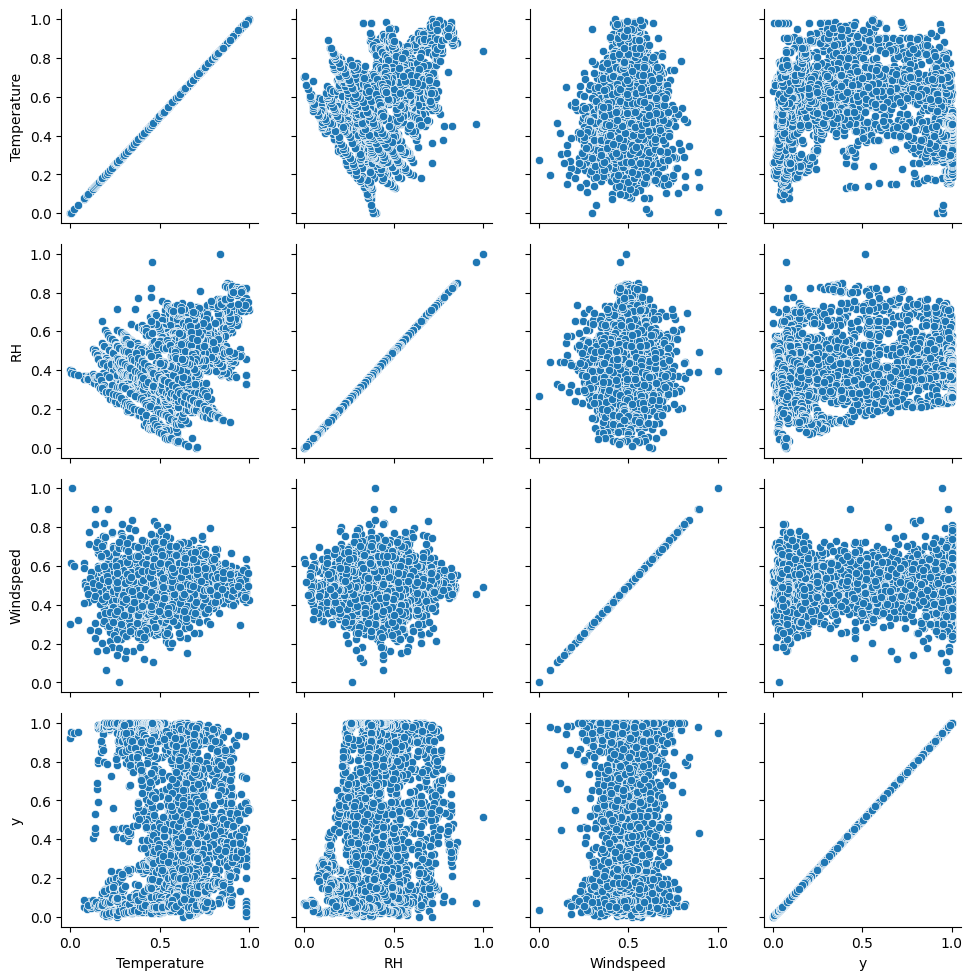

In [11]:
g = sns.PairGrid(normalized_df[["Temperature", "RH", "Windspeed", "y"]])
g.map(sns.scatterplot)
plt.show()

In [12]:
train = normalized_df[normalized_df['ds'] < '2021-12-16 00:00:00']
test = normalized_df[normalized_df['ds'] >= '2021-12-16 00:00:00']
print('train Shape', train.shape)
print('test Shape', test.shape)


train Shape (2921, 5)
test Shape (59, 5)


In [14]:
test1 = data[data['ds'] >= '2021-12-16 00:00:00']
print('test Shape', test1.shape)
test1

test Shape (59, 5)


,ds,Temperature,RH,Windspeed,y
2921,2021-12-16 09:10:00,26.3570,59.4630,1.8078,0.111
2922,2021-12-16 09:15:00,26.5138,57.7414,1.8068,0.094
2923,2021-12-16 09:20:00,26.7386,57.1244,1.8530,0.112
2924,2021-12-16 09:25:00,26.7556,56.6154,1.7632,0.123
2925,2021-12-16 09:30:00,26.9252,55.9558,1.5730,0.136
2926,2021-12-16 09:35:00,27.1718,55.0054,1.7632,0.154
2927,2021-12-16 09:40:00,27.2984,54.1164,1.7462,0.161
2928,2021-12-16 09:45:00,27.3976,53.6244,1.6644,0.156
2929,2021-12-16 09:50:00,27.4496,53.0188,1.7654,0.198
2930,2021-12-16 09:55:00,27.5436,52.6994,1.7786,0.281


# Time Series Forecasting with Prophet Prediction

In [15]:
model = Prophet()
# model.add_regressor('Eeg')
model.add_regressor('Temperature')
model.add_regressor('RH')
model.add_regressor('Windspeed')
model.fit(train)

19:23:04 - cmdstanpy - INFO - Chain [1] start processing
19:23:05 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
df_test = test[['ds','Temperature','RH','Windspeed']]
df_test

,ds,Temperature,RH,Windspeed
2921,2021-12-16 09:10:00,0.369346,0.488966,0.650658
2922,2021-12-16 09:15:00,0.381910,0.462405,0.648879
2923,2021-12-16 09:20:00,0.399923,0.452885,0.731057
2924,2021-12-16 09:25:00,0.401285,0.445032,0.571327
2925,2021-12-16 09:30:00,0.414875,0.434856,0.233013
2926,2021-12-16 09:35:00,0.434635,0.420193,0.571327
2927,2021-12-16 09:40:00,0.444779,0.406477,0.541089
2928,2021-12-16 09:45:00,0.452728,0.398887,0.395589
2929,2021-12-16 09:50:00,0.456895,0.389543,0.575240
2930,2021-12-16 09:55:00,0.464427,0.384616,0.598719


In [17]:
df_test1 = test1[['ds','y']]
df_test1

,ds,y
2921,2021-12-16 09:10:00,0.111
2922,2021-12-16 09:15:00,0.094
2923,2021-12-16 09:20:00,0.112
2924,2021-12-16 09:25:00,0.123
2925,2021-12-16 09:30:00,0.136
2926,2021-12-16 09:35:00,0.154
2927,2021-12-16 09:40:00,0.161
2928,2021-12-16 09:45:00,0.156
2929,2021-12-16 09:50:00,0.198
2930,2021-12-16 09:55:00,0.281


In [18]:
predict = model.predict(df_test)
predict1 = predict[['ds','yhat']]
predict1

,ds,yhat
0,2021-12-16 09:10:00,0.363689
1,2021-12-16 09:15:00,0.352738
2,2021-12-16 09:20:00,0.339637
3,2021-12-16 09:25:00,0.355499
4,2021-12-16 09:30:00,0.377128
5,2021-12-16 09:35:00,0.342881
6,2021-12-16 09:40:00,0.342668
7,2021-12-16 09:45:00,0.355205
8,2021-12-16 09:50:00,0.345098
9,2021-12-16 09:55:00,0.346826


In [19]:
final_df = pd.merge(predict1,df_test, on=['ds'])
final_df

,ds,yhat,Temperature,RH,Windspeed
0,2021-12-16 09:10:00,0.363689,0.369346,0.488966,0.650658
1,2021-12-16 09:15:00,0.352738,0.381910,0.462405,0.648879
2,2021-12-16 09:20:00,0.339637,0.399923,0.452885,0.731057
3,2021-12-16 09:25:00,0.355499,0.401285,0.445032,0.571327
4,2021-12-16 09:30:00,0.377128,0.414875,0.434856,0.233013
5,2021-12-16 09:35:00,0.342881,0.434635,0.420193,0.571327
6,2021-12-16 09:40:00,0.342668,0.444779,0.406477,0.541089
7,2021-12-16 09:45:00,0.355205,0.452728,0.398887,0.395589
8,2021-12-16 09:50:00,0.345098,0.456895,0.389543,0.575240
9,2021-12-16 09:55:00,0.346826,0.464427,0.384616,0.598719


In [20]:
final = scaler.inverse_transform(final_df[['Temperature','RH','Windspeed','yhat']])
final

array([[26.357     , 59.463     ,  1.8078    ,  0.36687054],
       [26.5138    , 57.7414    ,  1.8068    ,  0.35597397],
       [26.7386    , 57.1244    ,  1.853     ,  0.34293889],
       [26.7556    , 56.6154    ,  1.7632    ,  0.35872186],
       [26.9252    , 55.9558    ,  1.573     ,  0.38024281],
       [27.1718    , 55.0054    ,  1.7632    ,  0.34616704],
       [27.2984    , 54.1164    ,  1.7462    ,  0.34595507],
       [27.3976    , 53.6244    ,  1.6644    ,  0.35842898],
       [27.4496    , 53.0188    ,  1.7654    ,  0.34837247],
       [27.5436    , 52.6994    ,  1.7786    ,  0.35009151],
       [27.8648    , 52.1288    ,  1.7808    ,  0.3414052 ],
       [28.0458    , 51.3876    ,  1.789     ,  0.33756254],
       [27.969     , 51.2794    ,  1.648     ,  0.36961774],
       [28.1836    , 50.8898    ,  1.7338    ,  0.3563579 ],
       [28.2418    , 50.82      ,  1.7456    ,  0.3622626 ],
       [28.1966    , 50.784     ,  1.718     ,  0.37845192],
       [28.2844    , 50.

In [22]:
col = final_df[['Temperature','RH','Windspeed','yhat']]

In [24]:
switch_col = ['ds','Temperature','RH','Windspeed','y','yhat']

In [25]:
final_in = pd.DataFrame(final,columns=col.columns)
final_in[['ds']] = final_df[['ds']]
final_in

,Temperature,RH,Windspeed,yhat,ds
0,26.3570,59.4630,1.8078,0.366871,2021-12-16 09:10:00
1,26.5138,57.7414,1.8068,0.355974,2021-12-16 09:15:00
2,26.7386,57.1244,1.8530,0.342939,2021-12-16 09:20:00
3,26.7556,56.6154,1.7632,0.358722,2021-12-16 09:25:00
4,26.9252,55.9558,1.5730,0.380243,2021-12-16 09:30:00
5,27.1718,55.0054,1.7632,0.346167,2021-12-16 09:35:00
6,27.2984,54.1164,1.7462,0.345955,2021-12-16 09:40:00
7,27.3976,53.6244,1.6644,0.358429,2021-12-16 09:45:00
8,27.4496,53.0188,1.7654,0.348372,2021-12-16 09:50:00
9,27.5436,52.6994,1.7786,0.350092,2021-12-16 09:55:00


In [26]:
final_marge = pd.merge(df_test1,final_in, on=['ds'])
final_marge

,ds,y,Temperature,RH,Windspeed,yhat
0,2021-12-16 09:10:00,0.111,26.3570,59.4630,1.8078,0.366871
1,2021-12-16 09:15:00,0.094,26.5138,57.7414,1.8068,0.355974
2,2021-12-16 09:20:00,0.112,26.7386,57.1244,1.8530,0.342939
3,2021-12-16 09:25:00,0.123,26.7556,56.6154,1.7632,0.358722
4,2021-12-16 09:30:00,0.136,26.9252,55.9558,1.5730,0.380243
5,2021-12-16 09:35:00,0.154,27.1718,55.0054,1.7632,0.346167
6,2021-12-16 09:40:00,0.161,27.2984,54.1164,1.7462,0.345955
7,2021-12-16 09:45:00,0.156,27.3976,53.6244,1.6644,0.358429
8,2021-12-16 09:50:00,0.198,27.4496,53.0188,1.7654,0.348372
9,2021-12-16 09:55:00,0.281,27.5436,52.6994,1.7786,0.350092


In [27]:
final_switch = final_marge.reindex(columns=switch_col)
final_switch

,ds,Temperature,RH,Windspeed,y,yhat
0,2021-12-16 09:10:00,26.3570,59.4630,1.8078,0.111,0.366871
1,2021-12-16 09:15:00,26.5138,57.7414,1.8068,0.094,0.355974
2,2021-12-16 09:20:00,26.7386,57.1244,1.8530,0.112,0.342939
3,2021-12-16 09:25:00,26.7556,56.6154,1.7632,0.123,0.358722
4,2021-12-16 09:30:00,26.9252,55.9558,1.5730,0.136,0.380243
5,2021-12-16 09:35:00,27.1718,55.0054,1.7632,0.154,0.346167
6,2021-12-16 09:40:00,27.2984,54.1164,1.7462,0.161,0.345955
7,2021-12-16 09:45:00,27.3976,53.6244,1.6644,0.156,0.358429
8,2021-12-16 09:50:00,27.4496,53.0188,1.7654,0.198,0.348372
9,2021-12-16 09:55:00,27.5436,52.6994,1.7786,0.281,0.350092


In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(mode='lines', x= data['ds'], y = data["y"], name='actual'))
# fig.add_trace(go.Scatter(mode='lines', x= final_switch['ds'], y = final_switch["y"], name='Real data'))
fig.add_trace(go.Scatter(mode='lines', x=final_switch['ds'], y = final_switch["yhat"], name='forecast_prophet_predict'))


fig.update_layout(
    autosize=True,
    height=600,
    title="Prophet Model",
    xaxis_title="Date",
    yaxis_title="Cloud cover",
)


fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1.zoom",
                     step="hour",
                     stepmode="backward"),
                 dict(count=2,
                     label="2.zoom",
                     step="hour",
                     stepmode="backward"),
                dict(count=3,
                     label="3.zoom",
                     step="day",
                     stepmode="backward"),              

                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [30]:
prophet_mse_error = mean_squared_error(final_switch["y"], final_switch["yhat"], squared=True)
prophet_rmse_error = mean_squared_error(final_switch["y"], final_switch["yhat"], squared=False)
prophet_mae_error = mae(final_switch["y"], final_switch["yhat"])
prophet_mape_error = mape(final_switch["y"], final_switch["yhat"])
print(f'MAPE Error : {prophet_mape_error}')
print(f'MSE Error: {prophet_mse_error}')
print(f'MAE Error: {prophet_mae_error}')
print(f'RMSE Error: {prophet_rmse_error}')

MAPE Error : 0.9714944790177261
MSE Error: 0.0354966988673364
MAE Error: 0.16830094868049855
RMSE Error: 0.18840567631400174


---